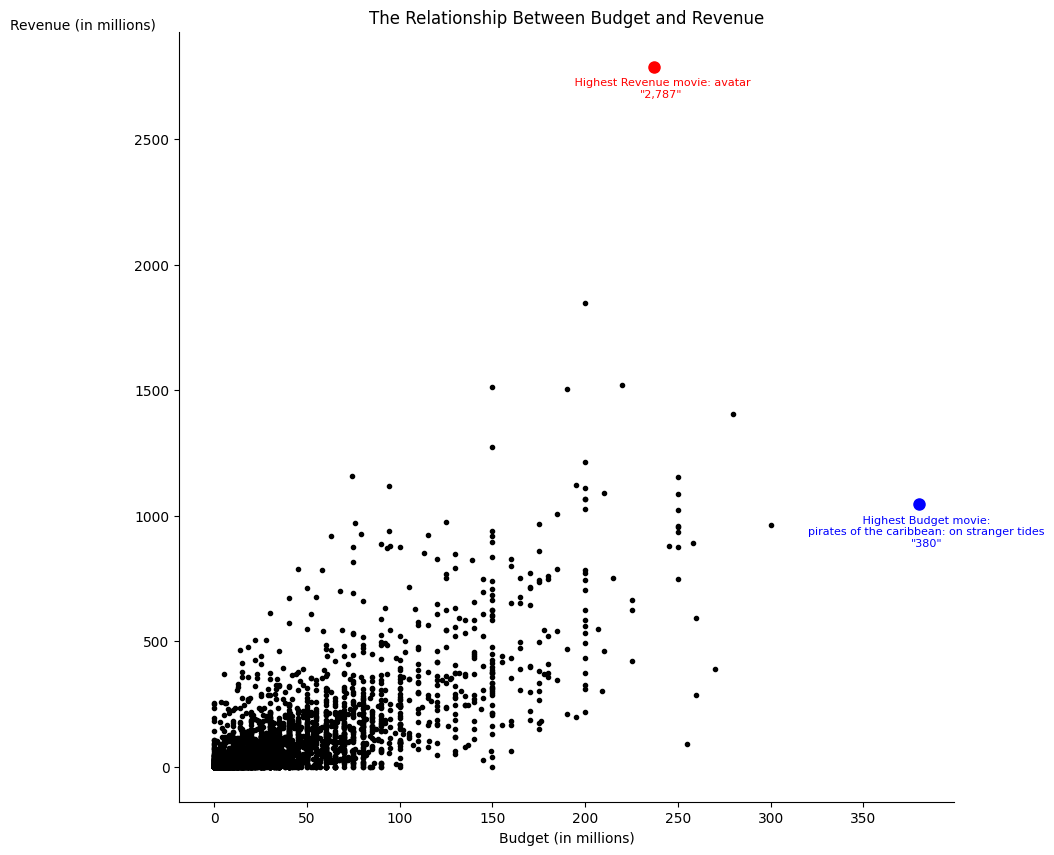

In [8]:
import numpy as np # `np` is a common alias for `numpy`
import matplotlib.pyplot as plt # `plt` is a common alias for `matplotlib.pyplot`
import pandas as pd # `pd` is a common alias for `pandas`
# The line below is only needed for jupyter notebooks 
# it tells matplotlib to display the plots in the notebook
%matplotlib inline

df = pd.read_csv('tmdb_5000_movies.csv')  # df is a common name for `DataFrame`


##############################################################################################
df_relevant = df[ # take the relevant data for the table
    [
        'title', 'release_date' ,'budget', 'revenue'
        
    ]
]

df_relevant = df_relevant.loc[(df_relevant['release_date'] > '1990')].copy() #for table
df_recent = df_relevant.set_index('revenue').sort_index().copy() #for table

# df_mine = df_relevant.set_index('budget').sort_index().copy() ##
##############################################################################################

# Create a scatter plot of budget vs revenue
fig, ax = plt.subplots(figsize=(10, 10)) # 10x10 inch size
ax.plot(df_relevant['budget'] / 1e6, df_relevant['revenue'] / 1e6, '.', color='black')  # Set regular points to black


# Set axis labels and title
ax.set_xlabel('Budget (in millions)')
ax.set_ylabel(
    'Revenue (in millions)', 
    rotation=0, # Rotate the label to 0 degrees for horizontal alignment
    ha='right', # ha is horizontal alignment; align the end of label text with Y-axis
    ma='left' # ma is marginal alignment; align the label text with the end of the axis
)

# Find the movie with the highest revenue and budget
max_revenue_movie = df_relevant.loc[df_relevant['revenue'].idxmax()]
max_budget_movie = df_relevant.loc[df_relevant['budget'].idxmax()]

# Highlight the movies with the highest revenue in red and budget in blue
ax.plot(max_revenue_movie['budget'] / 1e6, max_revenue_movie['revenue'] / 1e6, 'o', color='red', markersize=8, label=f'Highest Revenue: {max_revenue_movie["title"]}')
ax.plot(max_budget_movie['budget'] / 1e6, max_budget_movie['revenue'] / 1e6, 'o', color='blue', markersize=8, label=f'Highest Budget: {max_budget_movie["title"]}')

# Add text labels for the movies with the highest revenue and budget
x_offset = 4  # Adjust this value as needed
y_offset = 2  # Adjust this value as needed
ax.text(max_revenue_movie['budget'] / 1e6 + x_offset, max_revenue_movie['revenue'] / 1e6 + y_offset, f'\n Highest Revenue movie: {max_revenue_movie["title"]}\n"{int(max_revenue_movie["revenue"] / 1e6):,}"', color='red', fontsize=8, va='top', ha='center')
ax.text(max_budget_movie['budget'] / 1e6 + x_offset, max_budget_movie['revenue'] / 1e6 + y_offset, f'\n Highest Budget movie: \n{max_budget_movie["title"]}\n"{int(max_budget_movie["budget"] / 1e6)}"', color='blue', fontsize=8, va='top', ha='center')
#note : to put the name and the value next to the point you can change the ha='center' to ha='left' but in our case the center is better in the view

# Remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# move yaxis label to the top
plt.gca().yaxis.set_label_coords(-0.03,1)

#add title to the plot
plt.title('The Relationship Between Budget and Revenue')

# Save the plot with high DPI and tight bounding box
plt.savefig('plot.png', dpi=120, bbox_inches='tight')
plt.show()

##############################################################################################
# df_recent
## df_mine ##